# Building and Visualizing word frequencies

Focus on build_freqs() helper function and visualize dataset fed into it

In [5]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np
from utils import process_tweet, build_freqs

# To avoid SSL-related error
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /Users/noahcowan-
[nltk_data]     maccallum/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/noahcowan-
[nltk_data]     maccallum/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets

print('Number of tweets: ', len(tweets))

Number of tweets:  10000


In [8]:
# Make labels array
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))
labels.shape

(10000,)

In [10]:
# Word frequency dictionary. Create a dictionary with the word counts from each corpus
freqs = build_freqs(tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')


type(freqs) = <class 'dict'>
len(freqs) = 13067


In [11]:
print(freqs)

psha', 0.0): 1, ('nia', 0.0): 1, ('strap', 0.0): 1, ('dz9055', 0.0): 1, ('entlead', 0.0): 1, ('590', 0.0): 1, ('twice', 0.0): 5, ('07:02', 0.0): 1, ('ifsc', 0.0): 1, ('mayor', 0.0): 1, ('biodivers', 0.0): 1, ('taxonom', 0.0): 1, ('collabor', 0.0): 1, ('speci', 0.0): 1, ('discoveri', 0.0): 1, ('collar', 0.0): 1, ('3:03', 0.0): 1, ('belt', 0.0): 1, ('smith', 0.0): 2, ('eyelin', 0.0): 1, ('therefor', 0.0): 1, ('netherland', 0.0): 1, ('el', 0.0): 1, ('jeb', 0.0): 1, ('blacklivesmatt', 0.0): 1, ('slogan', 0.0): 1, ('msnbc', 0.0): 1, ('jebbush', 0.0): 1, ('famish', 0.0): 1, ('marino', 0.0): 1, ('qualifi', 0.0): 2, ('suzi', 0.0): 1, ('skirt', 0.0): 1, ('tama', 0.0): 1, ('warrior', 0.0): 2, ('wound', 0.0): 1, ('iraq', 0.0): 1, ('be', 0.0): 2, ('camara', 0.0): 1, ('coveral', 0.0): 1, ('happili', 0.0): 1, ('sneezi', 0.0): 1, ('rogerwatch', 0.0): 1, ('stalker', 0.0): 1, ('velvet', 0.0): 1, ('tradit', 0.0): 1, ("people'", 0.0): 1, ('beheaviour', 0.0): 1, ("robert'", 0.0): 1, ('.\n.', 0.0): 2, ('aa

In [12]:
# Table of word counts, for some specific words. Assume each word is unique
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

data = []
for word in keys:
    pos = 0
    neg = 0

    # number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]

    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]

    data.append([word, pos, neg])

data


[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

In [13]:
np.log([1, 2, 3])

array([0.        , 0.69314718, 1.09861229])

In [15]:
np.log([x[1] + 1 for x in data]) 

array([5.35658627, 0.69314718, 4.59511985, 5.47646355, 2.94443898,
       1.79175947, 1.60943791, 4.18965474, 3.04452244, 3.40119738,
       8.18004072, 0.69314718, 0.69314718, 0.        , 1.79175947,
       1.09861229, 0.        , 3.13549422, 3.29583687, 2.07944154,
       3.8501476 , 1.09861229])

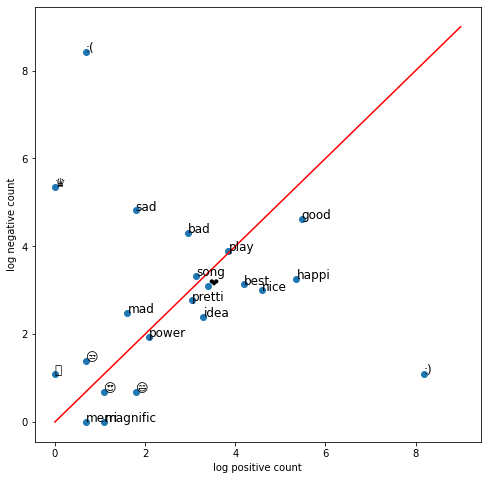

In [17]:
# Create scatter, on log scale

fig, ax = plt.subplots(figsize=(8,8))

x = np.log([x[1] + 1 for x in data])
y = np.log([x[2] + 1 for x in data])

ax.scatter(x, y)

plt.xlabel('log positive count')
plt.ylabel('log negative count')
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0,9], [0,9], color='red')
plt.show()